# Image Classification ANN & GPU CPU Benchmarking

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print(f"GPU: {device}")
else:
    print("GPU is not available.")

GPU: Tesla T4


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
#Checking
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#data visualization
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

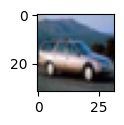

In [10]:
plot_sample(4)

In [11]:
#defining classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
y_train[3][0]

4

In [13]:
classes[y_train[3][0]]

'deer'

In [14]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [15]:
y_test.shape

(10000, 1)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
#Image Scalling
x_train_scaled = x_train/255
x_test_scaled = x_test/255

One Hot Encoding

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [19]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Model Building and Training

In [21]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8129 - accuracy: 0.3531
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6268 - accuracy: 0.4235
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5420 - accuracy: 0.4568
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4854 - accuracy: 0.4768
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4339 - accuracy: 0.4939
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3893 - accuracy: 0.5110
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3519 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3170 - accuracy: 0.5364
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2847 - accuracy: 0.5470
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [22]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


3

In [23]:
y_test[0][0]

3

So, the prediction is correct

In [24]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
#Training time required via CPU
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 132s 84ms/step - loss: 1.8127 - accuracy: 0.3545
2min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
#Training time required via GPU
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8148 - accuracy: 0.3524
12.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# **Performance: GPU >> CPU**

**While GPU takes 12.3s only, CPU 2min 13s demands around for one epoch.**